In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
import sklearn

In [2]:
pd_BS = pd.read_csv(r'C:\Users\Γιώργος\Desktop\THESIS\PYTHON\DATA\BsHyperparameter.csv')
X = pd_BS.to_numpy()

inputs_BS = np.array(X[:,:4])
outputs_BS = np.array(X[:,4])
pd_BS.head()

,mns,tau,r,sigma,V/K
0,1.541675,1.017447,0.039624,0.401359,0.610243
1,0.951482,0.780569,0.072641,0.388520,0.132538
2,0.621195,0.661421,0.081122,0.227687,0.000547
3,0.407832,0.270071,0.062614,0.635770,0.000247
4,0.952828,0.233924,0.045345,0.857275,0.141834


In [3]:
def build_model(n_hidden=6, n_neurons=200, learning_rate=3e-3, activationFn = "relu", input_shape=[4]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activationFn, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(keras.layers.Dense(1, activation = activationFn))      # No activation function in output layer 
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="mean_squared_error", metrics = "accuracy", optimizer=optimizer)
    return model

In [4]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [6]:
from sklearn.model_selection import GridSearchCV
param_distribs = {
"n_hidden" : [2, 3, 4, 5, 6],
"n_neurons": [50, 100, 150, 200, 250]
}
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
GrdSearch = GridSearchCV(keras_reg, param_distribs, scoring = "neg_mean_squared_error" ,cv = None)#cv = None => use of 5-fold 

In [7]:
GrdSearch.fit(inputs_BS, outputs_BS, epochs = 20)

Epoch 1/20
2500/2500 [==============================] - 3s 1ms/step - loss: 2.1958e-04 - accuracy: 0.0149
Epoch 2/20
2500/2500 [==============================] - 3s 1ms/step - loss: 2.4890e-05 - accuracy: 0.0149
Epoch 3/20
2500/2500 [==============================] - 4s 2ms/step - loss: 1.8958e-05 - accuracy: 0.0149
Epoch 4/20
2500/2500 [==============================] - 4s 2ms/step - loss: 1.7562e-05 - accuracy: 0.0149
Epoch 5/20
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3153e-05 - accuracy: 0.0149
Epoch 6/20
2500/2500 [==============================] - 6s 2ms/step - loss: 1.2699e-05 - accuracy: 0.0149
Epoch 7/20
2500/2500 [==============================] - 7s 3ms/step - loss: 1.0151e-05 - accuracy: 0.0149
Epoch 8/20
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1221e-05 - accuracy: 0.0149
Epoch 9/20
2500/2500 [==============================] - 6s 2ms/step - loss: 9.4986e-06 - accuracy: 0.0149
Epoch 10/20
2500/2500 [=======================

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002188033BFC8>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_hidden': [2, 3, 4, 5, 6],
                         'n_neurons': [50, 100, 150, 200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [110]:
#Architecture_comparison_BS = pd.DataFrame(GrdSearch.cv_results_)
report(GrdSearch.cv_results_, 6)

NameError: name 'GrdSearch' is not defined

In [12]:
Architecture_comparison_BS.to_csv(r'C:\Users\Γιώργος\Desktop\THESIS\PYTHON\HYPER-PARAMETER_RESULTS\ARCHITECTURE-COMPARISON\RESULTS.csv')

In [13]:
############################################

In [3]:
Architecture_comparison_BS

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_hidden,param_n_neurons,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,76.727525,15.752411,0.777014,0.570944,2,50,"{'n_hidden': 2, 'n_neurons': 50}",-0.000009,-0.000002,-0.104118,-0.000003,-1.053892e-01,-0.041904,5.131778e-02,13
1,1,67.369651,4.471940,0.452958,0.019797,2,100,"{'n_hidden': 2, 'n_neurons': 100}",-0.000002,-0.000002,-0.000002,-0.000001,-1.053892e-01,-0.021079,4.215495e-02,7
2,2,86.841556,3.301496,0.542738,0.059293,2,150,"{'n_hidden': 2, 'n_neurons': 150}",-0.000075,-0.000004,-0.000017,-0.000002,-9.461736e-07,-0.000020,2.844029e-05,5
3,3,94.695464,2.673696,0.675259,0.186998,2,200,"{'n_hidden': 2, 'n_neurons': 200}",-0.000004,-0.105161,-0.000002,-0.000004,-3.400022e-06,-0.021035,4.206286e-02,6
4,4,121.050531,7.198995,0.749404,0.209367,2,250,"{'n_hidden': 2, 'n_neurons': 250}",-0.000001,-0.000002,-0.000005,-0.000004,-1.254191e-05,-0.000005,3.971664e-06,3
5,5,76.499463,3.152178,0.528981,0.052553,3,50,"{'n_hidden': 3, 'n_neurons': 50}",-0.105426,-0.000005,-0.000042,-0.106066,-1.053892e-01,-0.063386,5.173568e-02,24
6,6,94.772948,4.714353,0.581336,0.111824,3,100,"{'n_hidden': 3, 'n_neurons': 100}",-0.000003,-0.000002,-0.000003,-0.000002,-1.951740e-06,-0.000002,5.979126e-07,2
7,7,104.715127,6.923911,0.823464,0.222500,3,150,"{'n_hidden': 3, 'n_neurons': 150}",-0.000004,-0.105161,-0.104118,-0.000005,-2.554569e-06,-0.041858,5.126169e-02,12
8,8,130.620418,5.517196,0.668708,0.052586,3,200,"{'n_hidden': 3, 'n_neurons': 200}",-0.000002,-0.000002,-0.104118,-0.106066,-1.053892e-01,-0.063115,5.153587e-02,23
9,9,149.577049,12.352197,0.818129,0.204665,3,250,"{'n_hidden': 3, 'n_neurons': 250}",-0.000001,-0.000002,-0.000001,-0.000002,-1.475554e-06,-0.000002,4.213679e-07,1


In [2]:
Architecture_comparison_BS = pd.read_csv(r'C:\Users\Γιώργος\Desktop\THESIS\PYTHON\HYPER-PARAMETER_RESULTS\ARCHITECTURE-COMPARISON\RESULTS.csv')

In [5]:
x = np.array(Architecture_comparison_BS['param_n_hidden'])
y = np.array(Architecture_comparison_BS['param_n_neurons'])
z = np.array(Architecture_comparison_BS['mean_test_score'])
z.shape

(25,)

In [7]:
x = np.array([2,3,4,5,6])
y = np.array([50,100,150,200,250])
X,Y = np.meshgrid(x,y)


In [29]:
z.reshape(5,5)
Z = z.reshape(5,5)
Z

array([[-4.19043819e-02, -2.10792516e-02, -1.96984705e-05,
        -2.10349074e-02, -5.16629808e-06],
       [-6.33856195e-02, -2.32673401e-06, -4.18581944e-02,
        -6.31153286e-02, -1.70018649e-06],
       [-4.21239167e-02, -4.20426845e-02, -2.12151180e-02,
        -2.12167895e-02, -1.20557465e-05],
       [-8.41558327e-02, -2.12164496e-02, -2.10897202e-02,
        -4.22465168e-02, -4.23000053e-02],
       [-6.29392244e-02, -4.23020555e-02, -4.19199630e-02,
        -4.21134281e-02, -4.19048542e-02]])

Text(0.5, 0.92, 'surface')

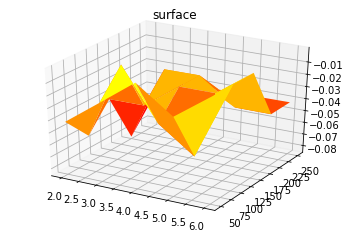

In [31]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap= 'autumn', edgecolor='none')
ax.set_title('surface')

In [79]:
X = z[:, 0]

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [77]:
Y.shape

(40, 40)

In [78]:
Z.shape

(40, 40)

array([[2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
      